# Titanic Competition

## 1. Goal description

**Goal**:

* Build model, to classify if titanic's passenger would survive / not survive
* Undestand relation between passenger features and survival status
* Compare different classification models and find one with best performance vs. complication ration

**Evaluation**:

* Supervised machine learning model will be used

* **Models**:
    * Naive Bayes classifier
    * K-nearest neighbors
    * Logistic regression
    * Linear discriminant analysis
    * Quadratic discriminant analysis
    * Decision tree
    * Random forest

* **Metrics**:
    * Precision
    * Recall
    * F1-metric
    * ROC-AUC 
    * Training time
    * Testing time
    * Accuracy

* **Technics**:
    * Forward selection
    * Cross validation
    * Grid search

## 2. Data collection

**Data**:

* Publicy available dataset from Kaggle competition
* Already divided into train and test set
* Contains information about passengers and their survival status
* Number of train observations: $891$
* Number of train columns: $12$
* Dependent variable: `Survived`

**Features**:

* `PassengerId`
* `Survival`
* `Pclass` - ticket class
* `Name`
* `Sex`
* `Age` - in years	
* `SibSp` - number of siblings / spouses aboard the Titanic	
* `Parch`	- number of parents / children aboard the Titanic	
* `Ticket` - ticket number	
* `Fare`
* `Cabin` - cabin number
* `Embarked` - port of embarkation

**Source**: https://www.kaggle.com/c/titanic/overview

In [113]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [114]:
train = pd.read_csv("data/train.csv")

In [115]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [116]:
train.shape

(891, 12)

## 3. Data review

### 3.1 General analysis

In [117]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [118]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [119]:
train.select_dtypes(["int64", "float64"]).describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [120]:
train.select_dtypes(["object"]).describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [121]:
train.select_dtypes(["int64", "float64"]).agg(["skew", "kurtosis"])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
skew,0.0,0.478523,-0.630548,0.389108,3.695352,2.749117,4.787317
kurtosis,-1.2,-1.775005,-1.280015,0.178274,17.880420,9.778125,33.398141


In [122]:
for col in train.columns:
    print(f"Columns: {col}\n{train[col].value_counts()}\n")

Columns: PassengerId
PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64

Columns: Survived
Survived
0    549
1    342
Name: count, dtype: int64

Columns: Pclass
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Columns: Name
Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64

Columns: Sex
Sex
male      577
female    314
Name: count, dtype: int64

Columns: Age
Age
24.00    30
22.00    27
1

In [123]:
for col in train.columns:
    print(f"Columns: {col}\nUnique values: {len(train[col].unique())}\n")

Columns: PassengerId
Unique values: 891

Columns: Survived
Unique values: 2

Columns: Pclass
Unique values: 3

Columns: Name
Unique values: 891

Columns: Sex
Unique values: 2

Columns: Age
Unique values: 89

Columns: SibSp
Unique values: 7

Columns: Parch
Unique values: 7

Columns: Ticket
Unique values: 681

Columns: Fare
Unique values: 248

Columns: Cabin
Unique values: 148

Columns: Embarked
Unique values: 4



In [124]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 3.2 Visual analysis

#### 3.2.1 Survived analysis

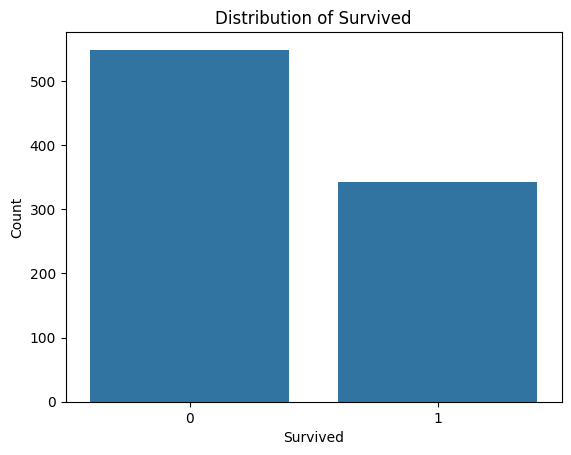

In [125]:
survived = train["Survived"].value_counts()

sns.barplot(
    x=survived.index,
    y=survived.values
)
plt.title("Distribution of Survived")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

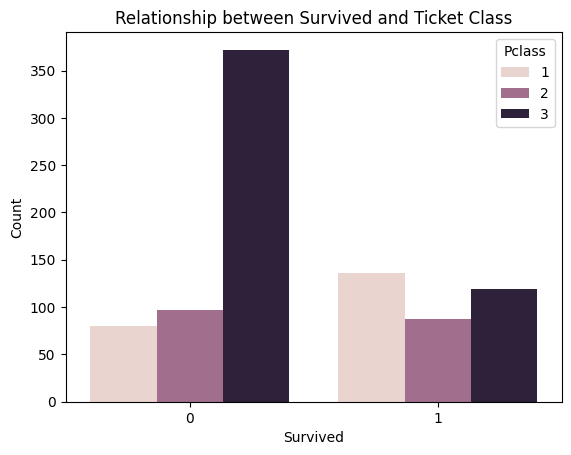

In [126]:
sns.countplot(
    data=train,
    x="Survived",
    hue="Pclass"
)
plt.title("Relationship between Survived and Ticket Class")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

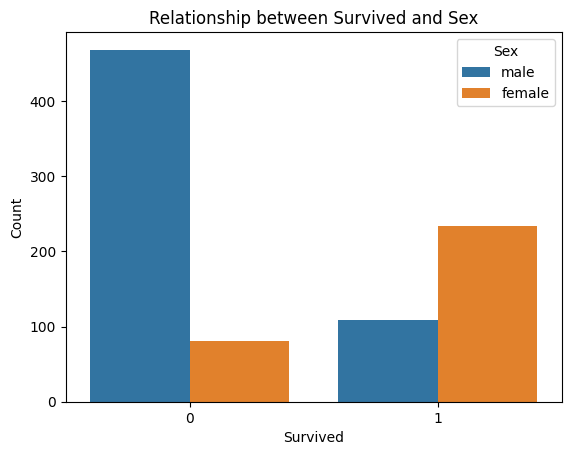

In [127]:
sns.countplot(
    data=train,
    x="Survived",
    hue="Sex"
)
plt.title("Relationship between Survived and Sex")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

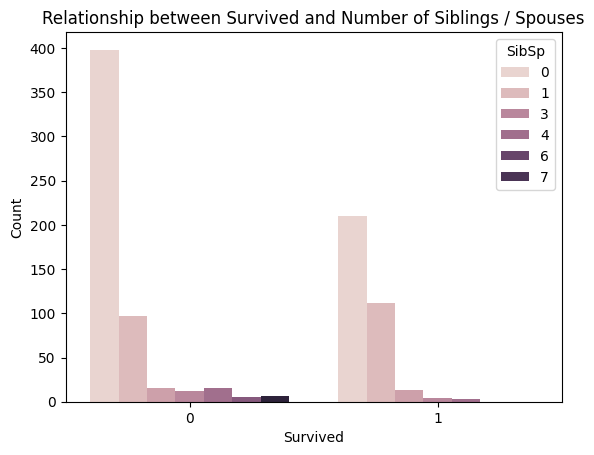

In [128]:
sns.countplot(
    data=train,
    x="Survived",
    hue="SibSp"
)
plt.title("Relationship between Survived and Number of Siblings / Spouses")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

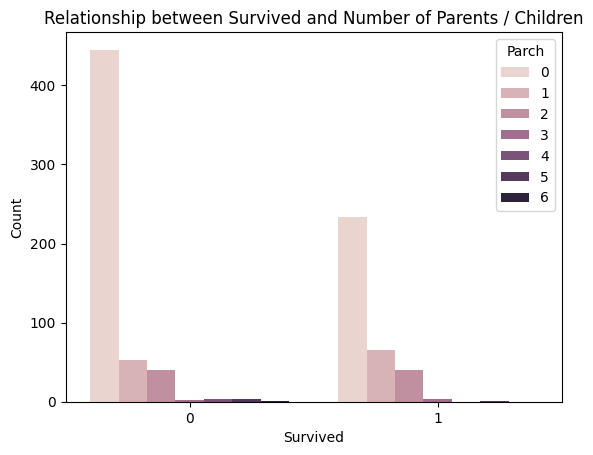

In [129]:
sns.countplot(
    data=train,
    x="Survived",
    hue="Parch"
)
plt.title("Relationship between Survived and Number of Parents / Children")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

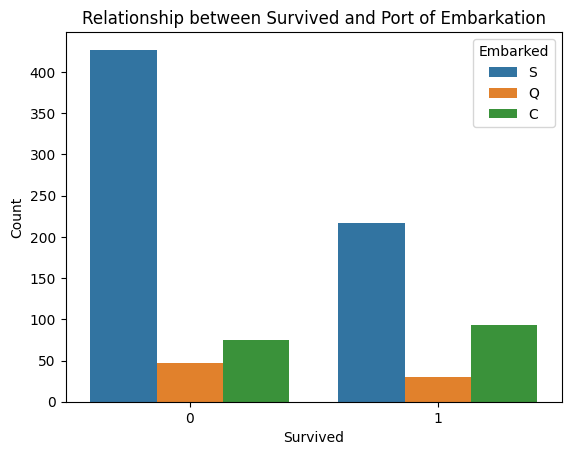

In [130]:
sns.countplot(
    data=train,
    x="Survived",
    hue="Embarked"
)
plt.title("Relationship between Survived and Port of Embarkation")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

#### 3.2.2 Ticket class analysis

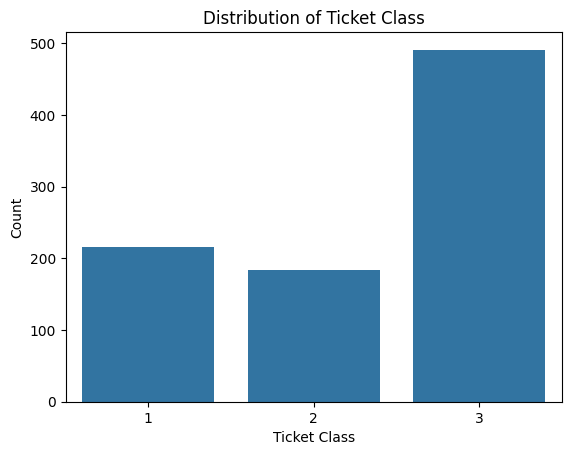

In [131]:
pclass = train["Pclass"].value_counts()

sns.barplot(
    x=pclass.index,
    y=pclass.values
)
plt.title("Distribution of Ticket Class")
plt.xlabel("Ticket Class")
plt.ylabel("Count")
plt.show()

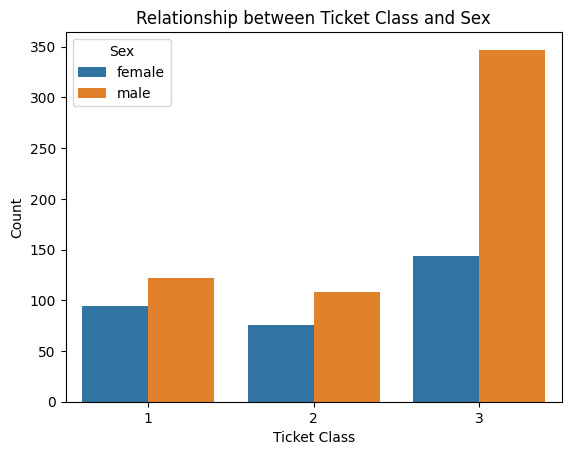

In [132]:
sns.countplot(
    data=train,
    x="Pclass",
    hue="Sex"
)
plt.title("Relationship between Ticket Class and Sex")
plt.xlabel("Ticket Class")
plt.ylabel("Count")
plt.show()

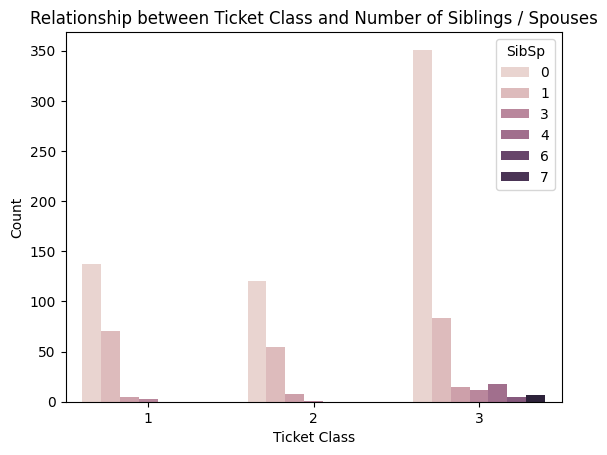

In [133]:
sns.countplot(
    data=train,
    x="Pclass",
    hue="SibSp"
)
plt.title("Relationship between Ticket Class and Number of Siblings / Spouses")
plt.xlabel("Ticket Class")
plt.ylabel("Count")
plt.show()

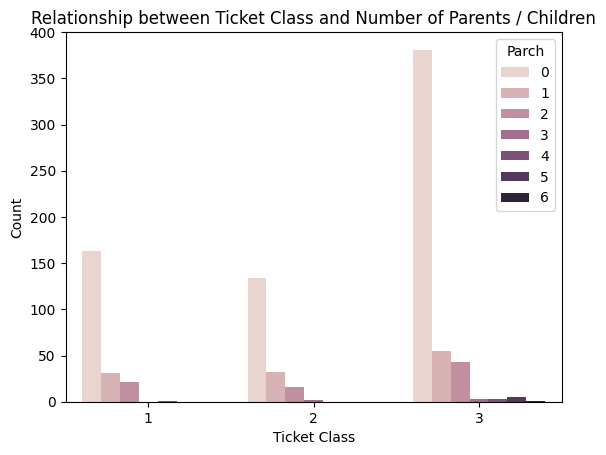

In [134]:
sns.countplot(
    data=train,
    x="Pclass",
    hue="Parch"
)
plt.title("Relationship between Ticket Class and Number of Parents / Children")
plt.xlabel("Ticket Class")
plt.ylabel("Count")
plt.show()

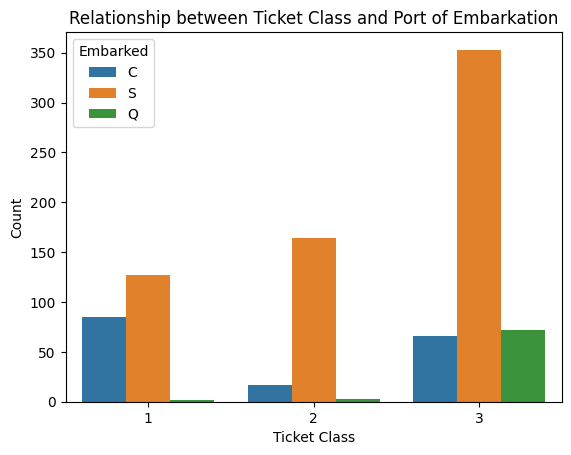

In [135]:
sns.countplot(
    data=train,
    x="Pclass",
    hue="Embarked"
)
plt.title("Relationship between Ticket Class and Port of Embarkation")
plt.xlabel("Ticket Class")
plt.ylabel("Count")
plt.show()

#### 3.2.3 Sex analysis

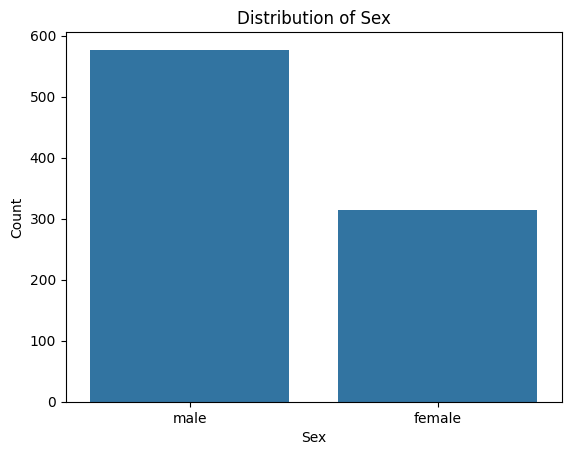

In [136]:
sex = train["Sex"].value_counts()

sns.barplot(
    x=sex.index,
    y=sex.values
)
plt.title("Distribution of Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

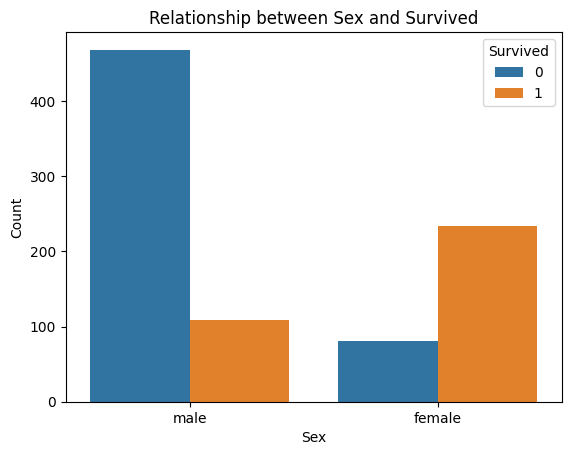

In [137]:
sns.countplot(
    data=train,
    x="Sex",
    hue="Survived"
)
plt.title("Relationship between Sex and Survived")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

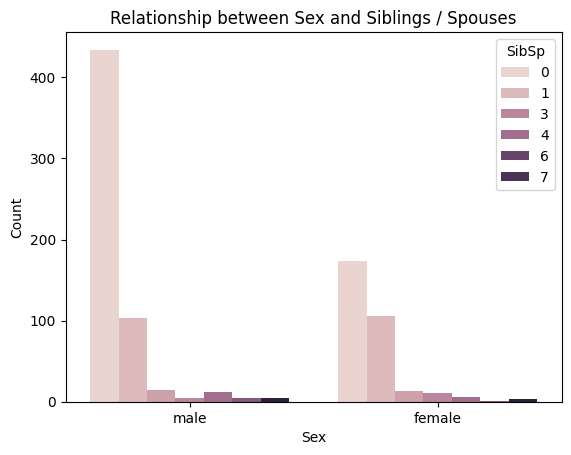

In [138]:
sns.countplot(
    data=train,
    x="Sex",
    hue="SibSp"
)
plt.title("Relationship between Sex and Siblings / Spouses")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

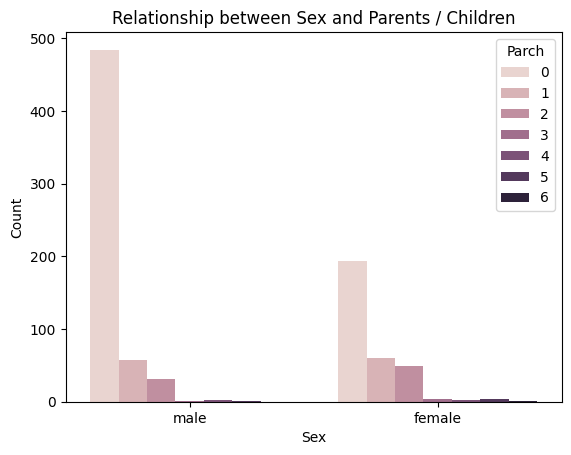

In [139]:
sns.countplot(
    data=train,
    x="Sex",
    hue="Parch"
)
plt.title("Relationship between Sex and Parents / Children")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

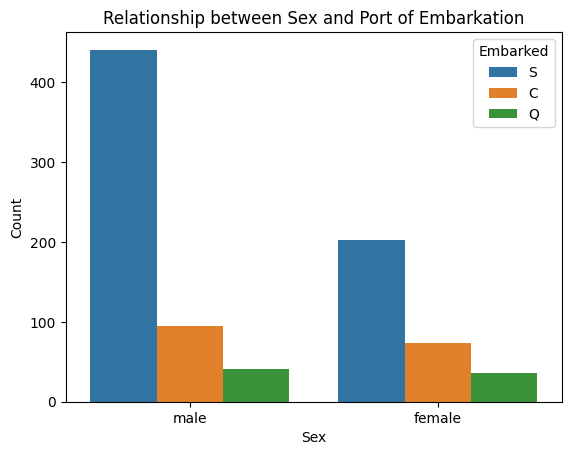

In [140]:
sns.countplot(
    data=train,
    x="Sex",
    hue="Embarked"
)
plt.title("Relationship between Sex and Port of Embarkation")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

#### 3.2.4 Age analysis

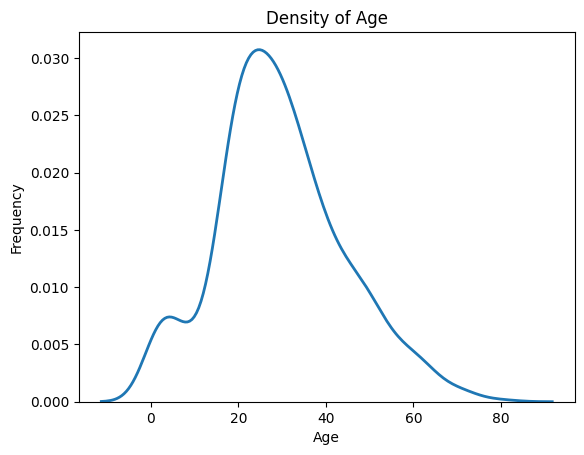

In [141]:
sns.kdeplot(
    data=train,
    x="Age",
    linewidth=2,
)

plt.title("Density of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

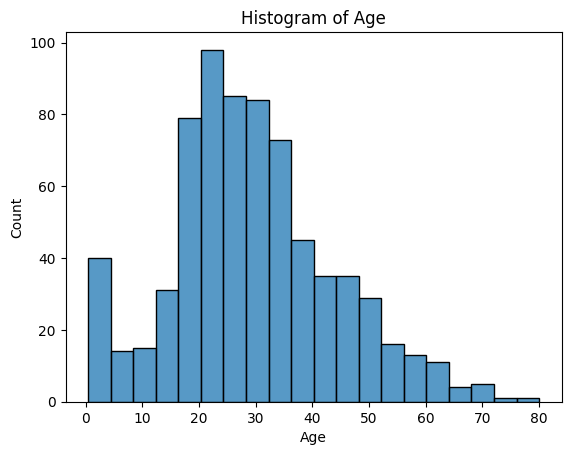

In [142]:
sns.histplot(
    data=train,
    x="Age",
    bins="auto",
)

plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

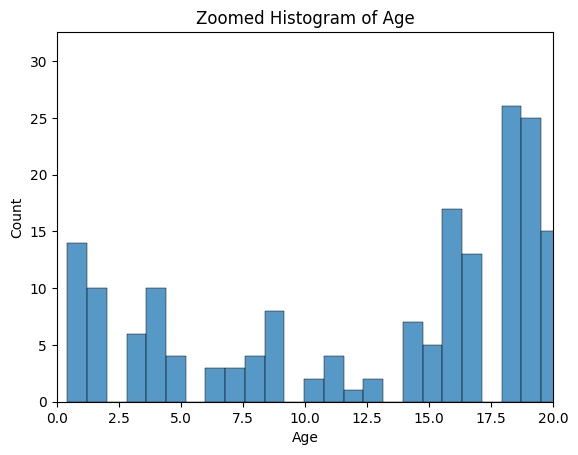

In [143]:
sns.histplot(
    data=train,
    x="Age",
    bins=100
)

plt.title("Zoomed Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.xlim([0, 20])
plt.show()

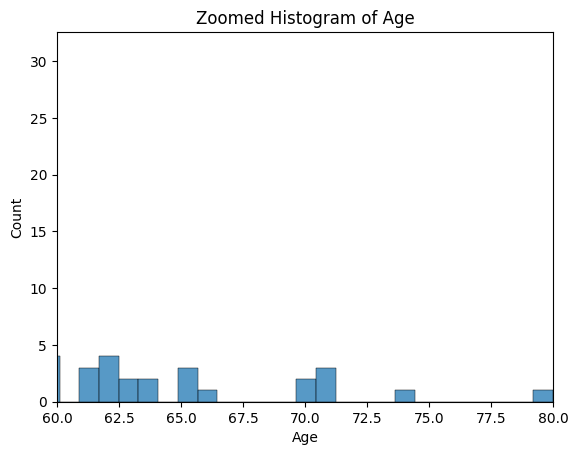

In [144]:
sns.histplot(
    data=train,
    x="Age",
    bins=100
)

plt.title("Zoomed Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.xlim([60, 80])
plt.show()

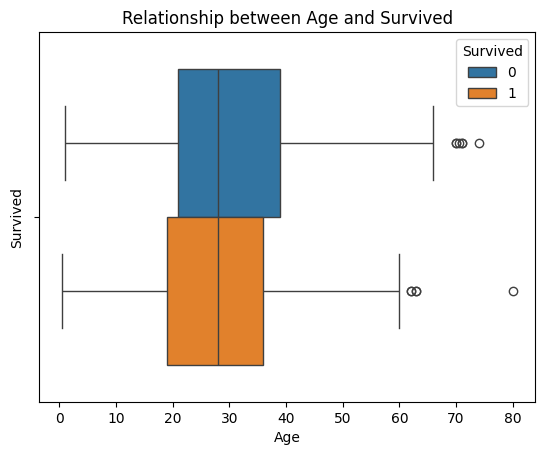

In [145]:
sns.boxplot(
    data=train,
    x="Age",
    hue="Survived",
)

plt.title("Relationship between Age and Survived")
plt.xlabel("Age")
plt.ylabel("Survived")
plt.show()

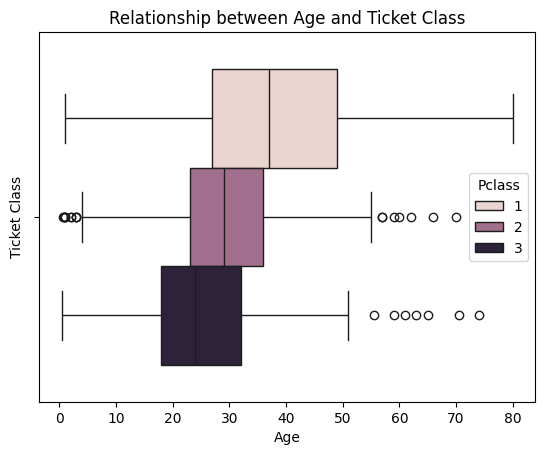

In [146]:
sns.boxplot(
    data=train,
    x="Age",
    hue="Pclass",
)

plt.title("Relationship between Age and Ticket Class")
plt.xlabel("Age")
plt.ylabel("Ticket Class")
plt.show()

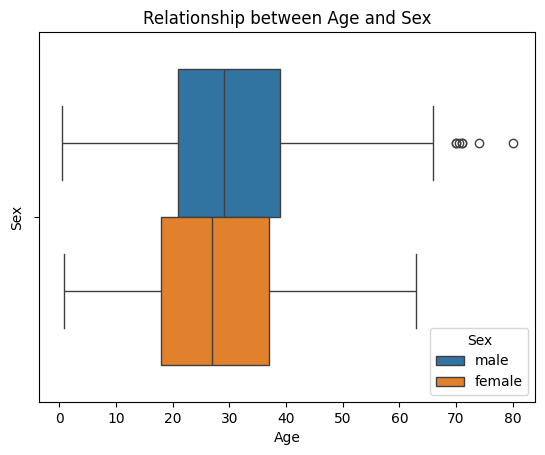

In [147]:
sns.boxplot(
    data=train,
    x="Age",
    hue="Sex",
)

plt.title("Relationship between Age and Sex")
plt.xlabel("Age")
plt.ylabel("Sex")
plt.show()

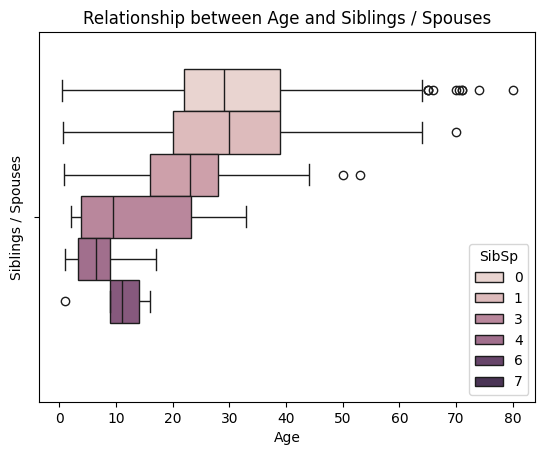

In [148]:
sns.boxplot(
    data=train,
    x="Age",
    hue="SibSp",
)

plt.title("Relationship between Age and Siblings / Spouses")
plt.xlabel("Age")
plt.ylabel("Siblings / Spouses")
plt.show()

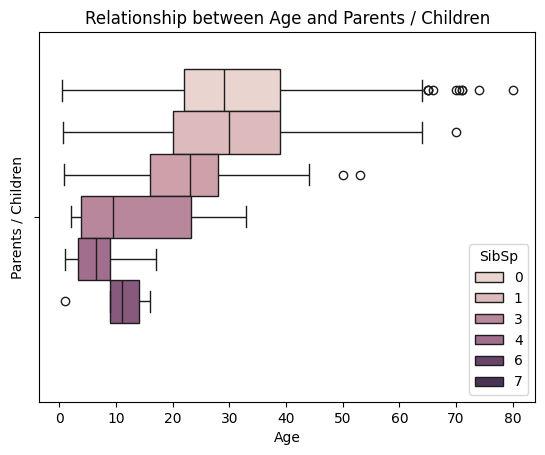

In [149]:
sns.boxplot(
    data=train,
    x="Age",
    hue="SibSp",
)

plt.title("Relationship between Age and Parents / Children")
plt.xlabel("Age")
plt.ylabel("Parents / Children")
plt.show()

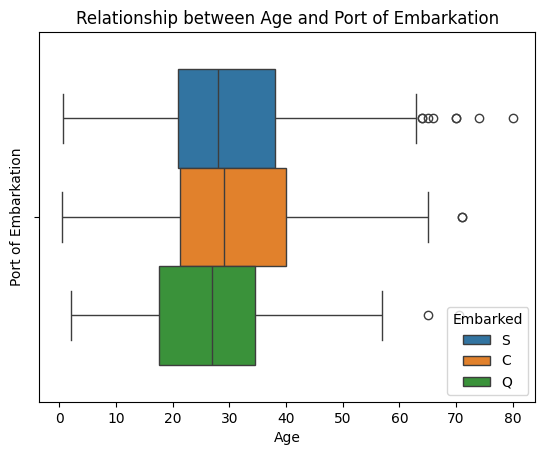

In [150]:
sns.boxplot(
    data=train,
    x="Age",
    hue="Embarked",
)

plt.title("Relationship between Age and Port of Embarkation")
plt.xlabel("Age")
plt.ylabel("Port of Embarkation")
plt.show()

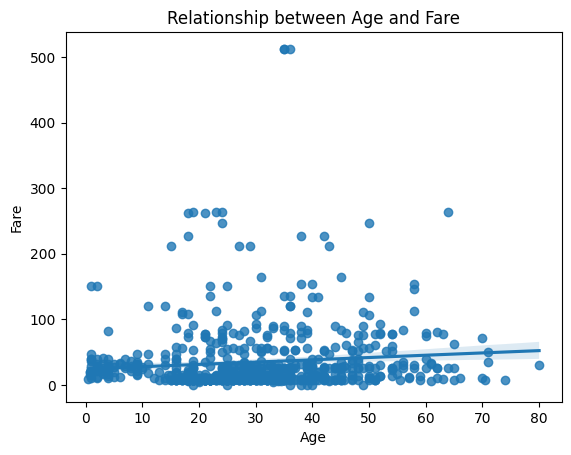

In [151]:
sns.regplot(
    data=train,
    x="Age",
    y="Fare"
)

plt.title("Relationship between Age and Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

#### 3.2.5 Siblings / Spouses analysis

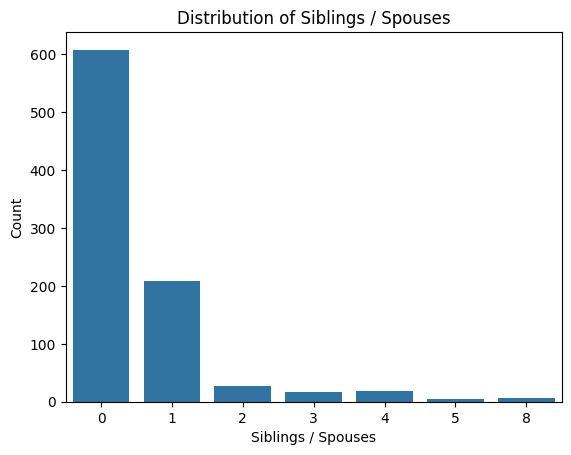

In [152]:
sibsp = train["SibSp"].value_counts()

sns.barplot(
    x=sibsp.index,
    y=sibsp.values
)
plt.title("Distribution of Siblings / Spouses")
plt.xlabel("Siblings / Spouses")
plt.ylabel("Count")
plt.show()

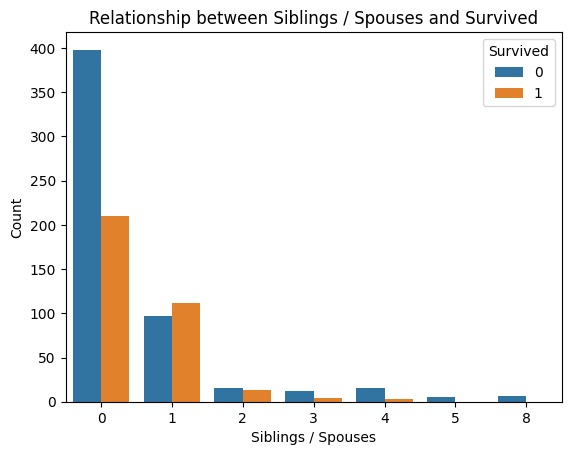

In [153]:
sns.countplot(
    data=train,
    x="SibSp",
    hue="Survived"
)
plt.title("Relationship between Siblings / Spouses and Survived")
plt.xlabel("Siblings / Spouses")
plt.ylabel("Count")
plt.show()

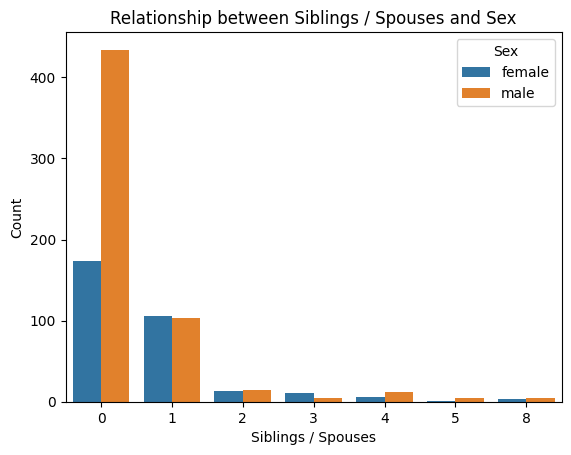

In [154]:
sns.countplot(
    data=train,
    x="SibSp",
    hue="Sex"
)
plt.title("Relationship between Siblings / Spouses and Sex")
plt.xlabel("Siblings / Spouses")
plt.ylabel("Count")
plt.show()

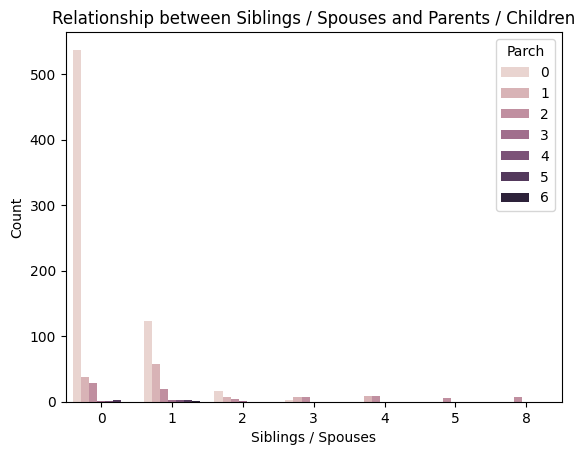

In [155]:
sns.countplot(
    data=train,
    x="SibSp",
    hue="Parch"
)
plt.title("Relationship between Siblings / Spouses and Parents / Children")
plt.xlabel("Siblings / Spouses")
plt.ylabel("Count")
plt.show()

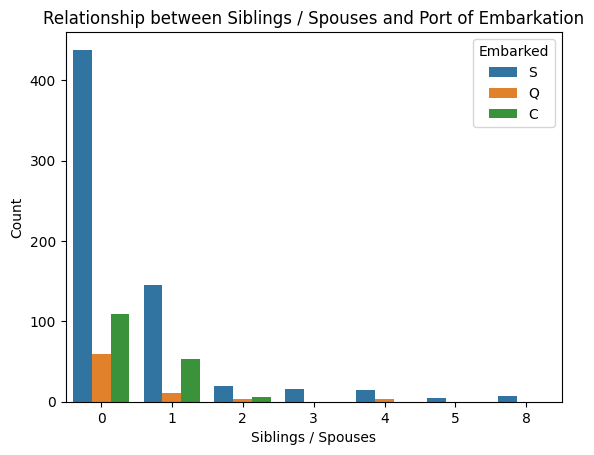

In [156]:
sns.countplot(
    data=train,
    x="SibSp",
    hue="Embarked"
)
plt.title("Relationship between Siblings / Spouses and Port of Embarkation")
plt.xlabel("Siblings / Spouses")
plt.ylabel("Count")
plt.show()

#### 3.2.6 Parents / Children analysis

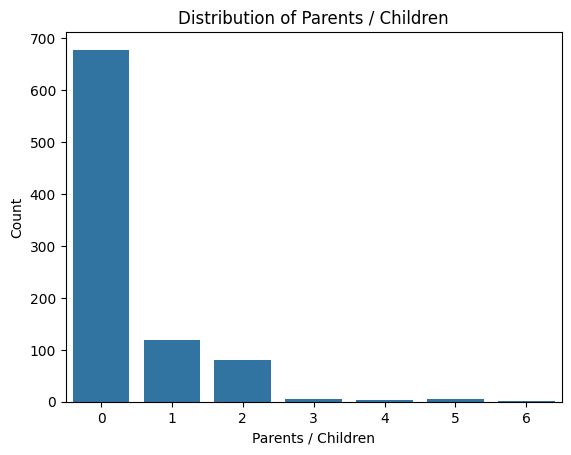

In [157]:
parch = train["Parch"].value_counts()

sns.barplot(
    x=parch.index,
    y=parch.values
)
plt.title("Distribution of Parents / Children")
plt.xlabel("Parents / Children")
plt.ylabel("Count")
plt.show()

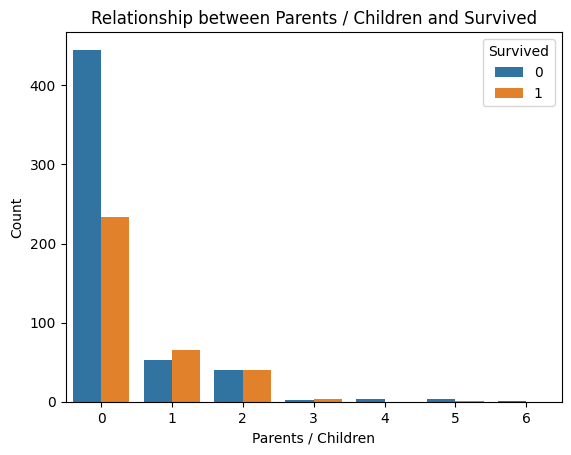

In [158]:
sns.countplot(
    data=train,
    x="Parch",
    hue="Survived"
)
plt.title("Relationship between Parents / Children and Survived")
plt.xlabel("Parents / Children")
plt.ylabel("Count")
plt.show()

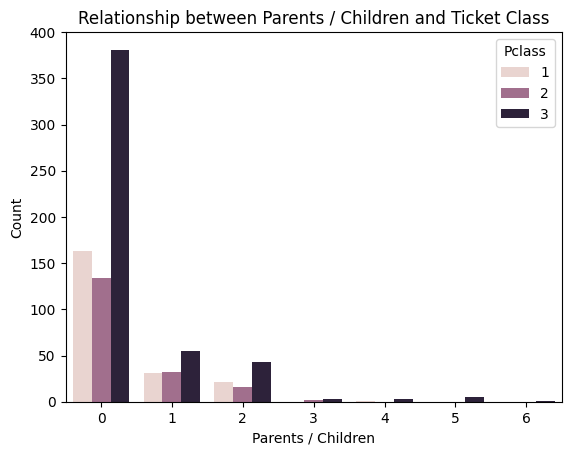

In [159]:
sns.countplot(
    data=train,
    x="Parch",
    hue="Pclass"
)
plt.title("Relationship between Parents / Children and Ticket Class")
plt.xlabel("Parents / Children")
plt.ylabel("Count")
plt.show()

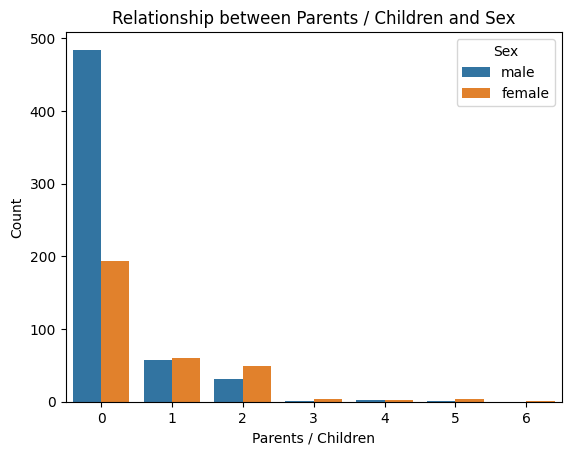

In [160]:
sns.countplot(
    data=train,
    x="Parch",
    hue="Sex"
)
plt.title("Relationship between Parents / Children and Sex")
plt.xlabel("Parents / Children")
plt.ylabel("Count")
plt.show()

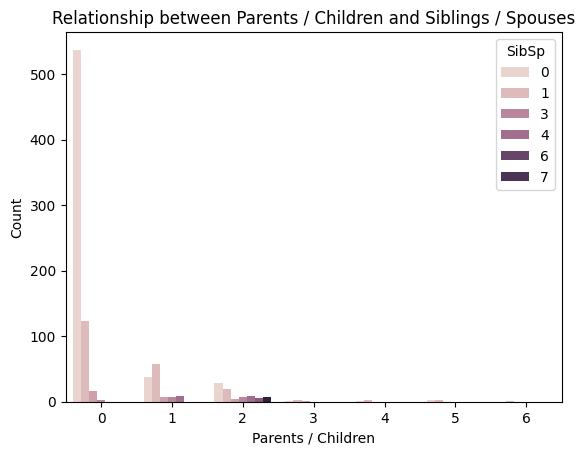

In [161]:
sns.countplot(
    data=train,
    x="Parch",
    hue="SibSp"
)
plt.title("Relationship between Parents / Children and Siblings / Spouses")
plt.xlabel("Parents / Children")
plt.ylabel("Count")
plt.show()

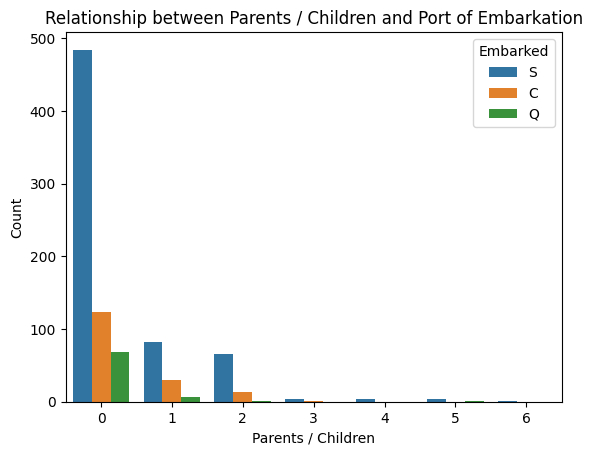

In [162]:
sns.countplot(
    data=train,
    x="Parch",
    hue="Embarked"
)
plt.title("Relationship between Parents / Children and Port of Embarkation")
plt.xlabel("Parents / Children")
plt.ylabel("Count")
plt.show()

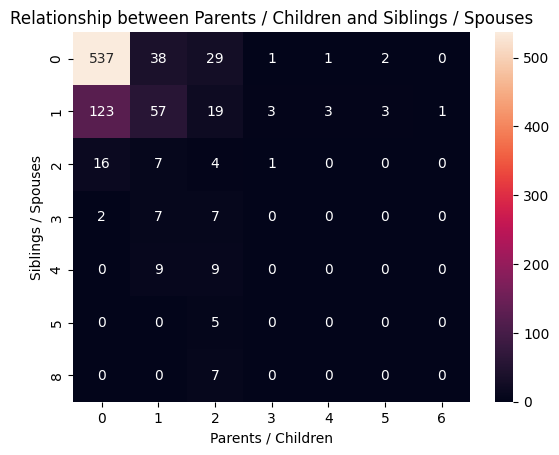

In [163]:
cross_table = pd.crosstab(train["SibSp"], train["Parch"])

sns.heatmap(cross_table, annot=True, fmt="d")

plt.title("Relationship between Parents / Children and Siblings / Spouses")
plt.xlabel("Parents / Children")
plt.ylabel("Siblings / Spouses")
plt.show()

#### 3.2.7 Fare analysis

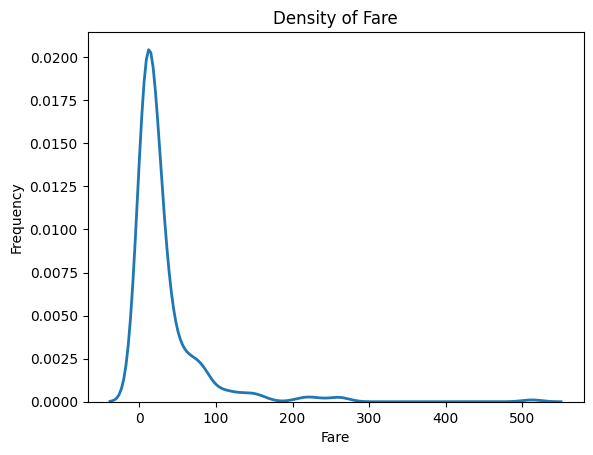

In [164]:
sns.kdeplot(
    data=train,
    x="Fare",
    linewidth=2,
)

plt.title("Density of Fare")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()

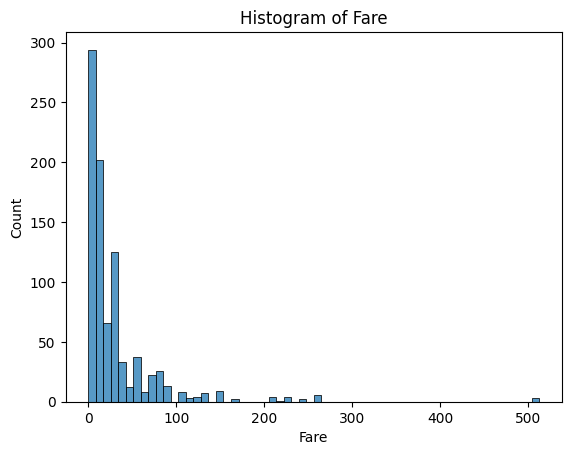

In [165]:
sns.histplot(
    data=train,
    x="Fare",
    bins="auto",
)

plt.title("Histogram of Fare")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

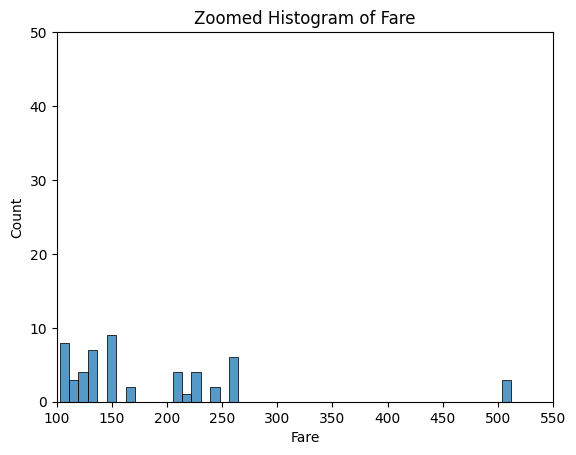

In [166]:
sns.histplot(
    data=train,
    x="Fare",
    bins="auto",
)

plt.title("Zoomed Histogram of Fare")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.xlim([100, 550])
plt.ylim([0, 50])
plt.show()

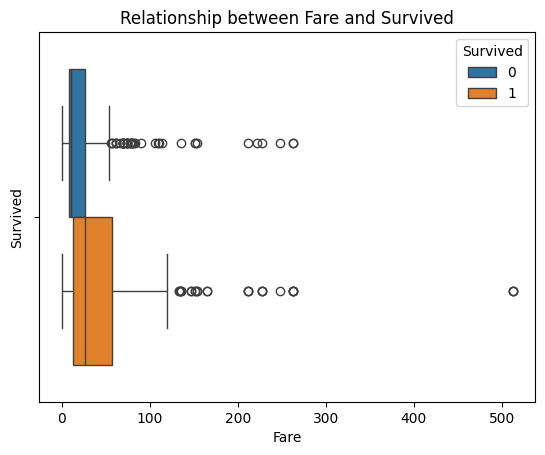

In [167]:
sns.boxplot(
    data=train,
    x="Fare",
    hue="Survived",
)

plt.title("Relationship between Fare and Survived")
plt.xlabel("Fare")
plt.ylabel("Survived")
plt.show()

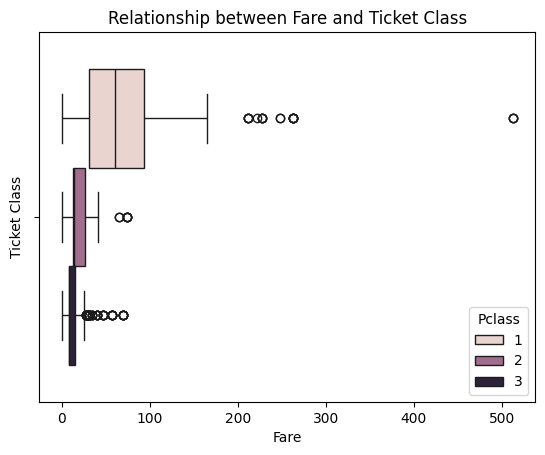

In [168]:
sns.boxplot(
    data=train,
    x="Fare",
    hue="Pclass",
)

plt.title("Relationship between Fare and Ticket Class")
plt.xlabel("Fare")
plt.ylabel("Ticket Class")
plt.show()

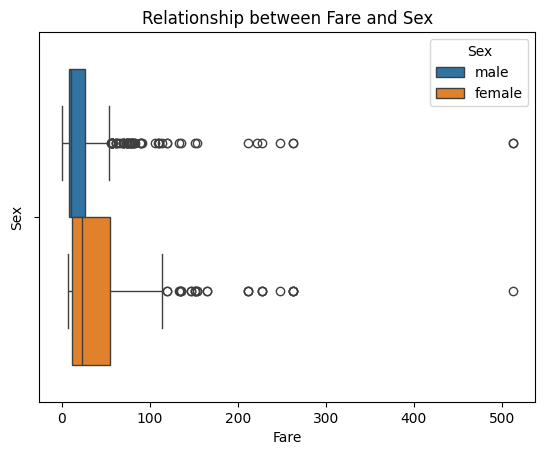

In [169]:
sns.boxplot(
    data=train,
    x="Fare",
    hue="Sex",
)

plt.title("Relationship between Fare and Sex")
plt.xlabel("Fare")
plt.ylabel("Sex")
plt.show()

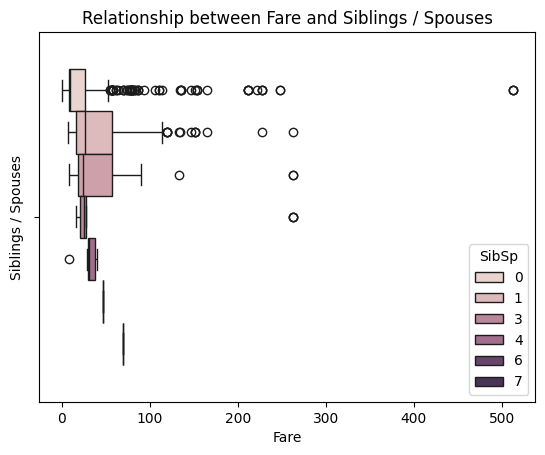

In [170]:
sns.boxplot(
    data=train,
    x="Fare",
    hue="SibSp",
)

plt.title("Relationship between Fare and Siblings / Spouses")
plt.xlabel("Fare")
plt.ylabel("Siblings / Spouses")
plt.show()

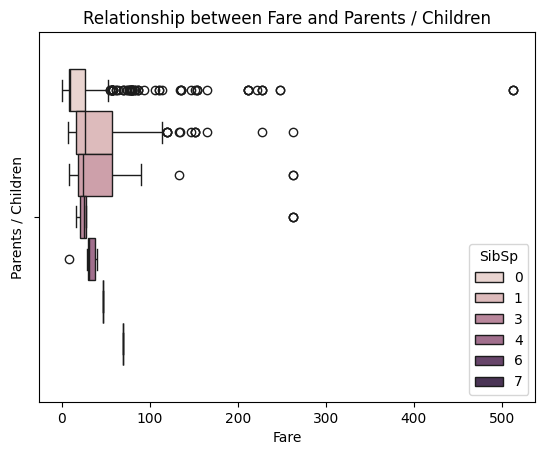

In [171]:
sns.boxplot(
    data=train,
    x="Fare",
    hue="SibSp",
)

plt.title("Relationship between Fare and Parents / Children")
plt.xlabel("Fare")
plt.ylabel("Parents / Children")
plt.show()

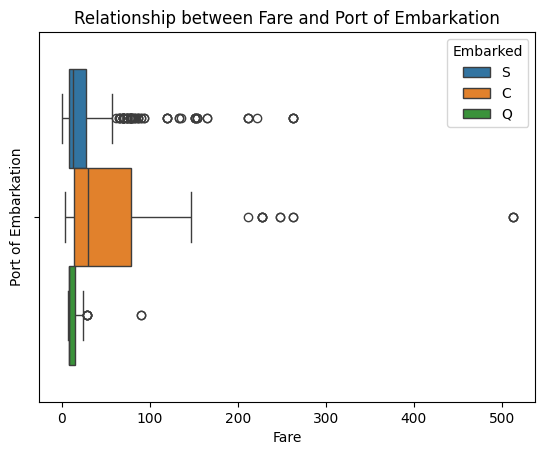

In [172]:
sns.boxplot(
    data=train,
    x="Fare",
    hue="Embarked",
)

plt.title("Relationship between Fare and Port of Embarkation")
plt.xlabel("Fare")
plt.ylabel("Port of Embarkation")
plt.show()

#### 3.2.8 Port of embarkation analysis

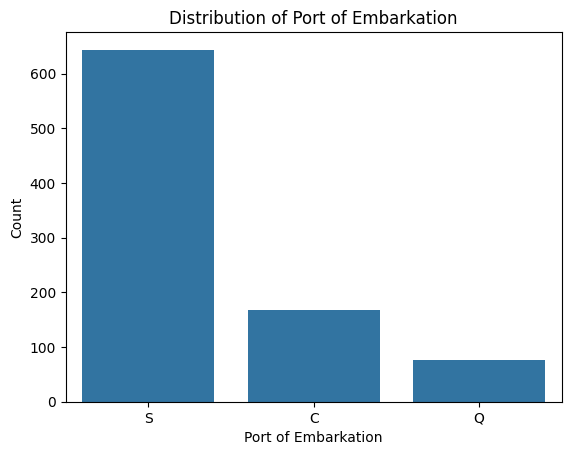

In [173]:
embarked = train["Embarked"].value_counts()

sns.barplot(
    x=embarked.index,
    y=embarked.values
)
plt.title("Distribution of Port of Embarkation")
plt.xlabel("Port of Embarkation")
plt.ylabel("Count")
plt.show()

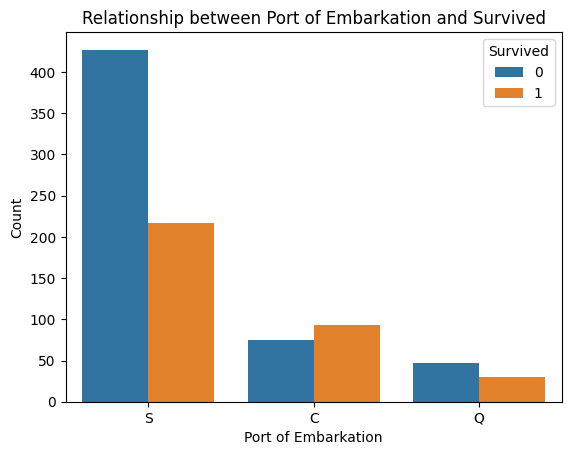

In [174]:
sns.countplot(
    data=train,
    x="Embarked",
    hue="Survived"
)
plt.title("Relationship between Port of Embarkation and Survived")
plt.xlabel("Port of Embarkation")
plt.ylabel("Count")
plt.show()

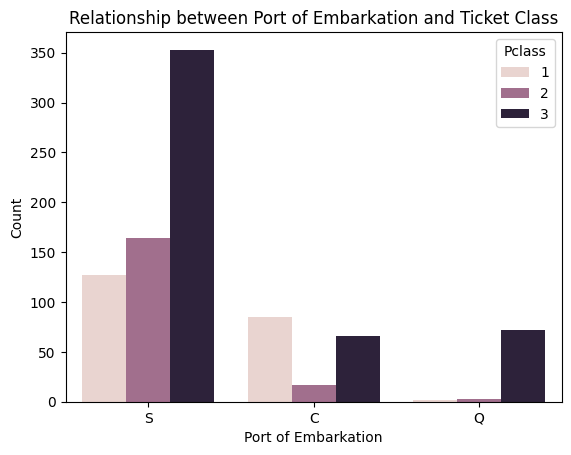

In [175]:
sns.countplot(
    data=train,
    x="Embarked",
    hue="Pclass"
)
plt.title("Relationship between Port of Embarkation and Ticket Class")
plt.xlabel("Port of Embarkation")
plt.ylabel("Count")
plt.show()

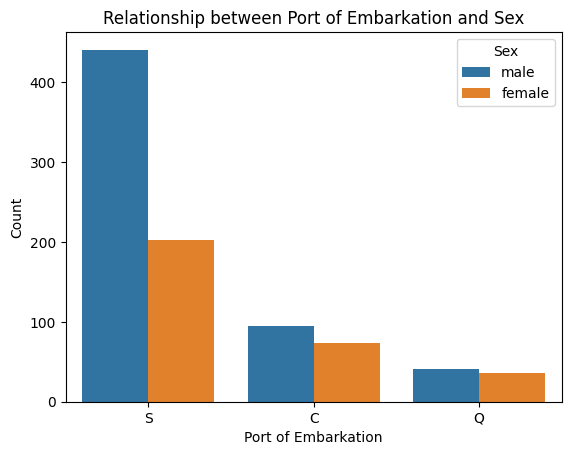

In [176]:
sns.countplot(
    data=train,
    x="Embarked",
    hue="Sex"
)
plt.title("Relationship between Port of Embarkation and Sex")
plt.xlabel("Port of Embarkation")
plt.ylabel("Count")
plt.show()

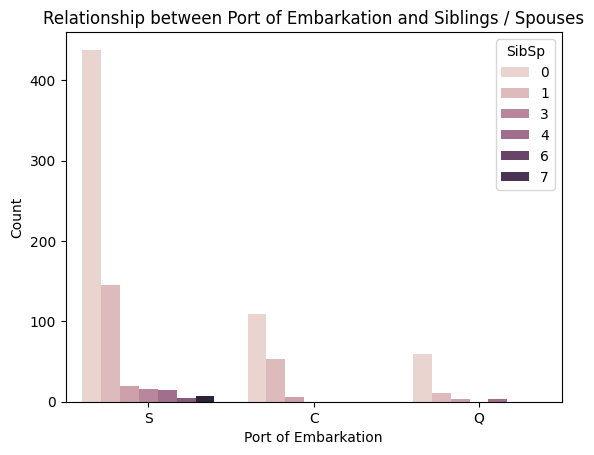

In [177]:
sns.countplot(
    data=train,
    x="Embarked",
    hue="SibSp"
)
plt.title("Relationship between Port of Embarkation and Siblings / Spouses")
plt.xlabel("Port of Embarkation")
plt.ylabel("Count")
plt.show()

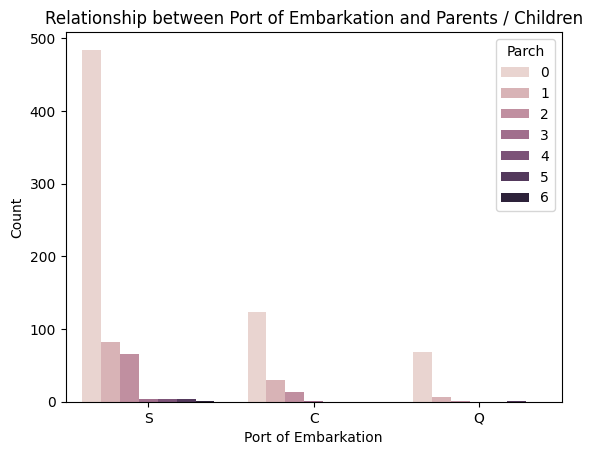

In [178]:
sns.countplot(
    data=train,
    x="Embarked",
    hue="Parch"
)
plt.title("Relationship between Port of Embarkation and Parents / Children")
plt.xlabel("Port of Embarkation")
plt.ylabel("Count")
plt.show()

## 4. Data preparation

### 4.1 Delete textual columns

In [179]:
train_clean = train[
    # Delete PassengerId, Name, Ticket, Cabin
    ["Survived", "Pclass", "Sex", "Age", "Fare", "Embarked", "SibSp", "Parch"]
]

In [180]:
train_clean.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'SibSp',
       'Parch'],
      dtype='object')

### 4.2 Fill out empty observations

In [181]:
train_clean["Age"].isna().sum()

np.int64(177)

In [182]:
GROUP_MEDIAN = train_clean.groupby(["Sex", "Pclass"])["Age"].median()
GROUP_MEDIAN

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [183]:
def fill_age(row):
    if pd.isnull(row["Age"]):
        return GROUP_MEDIAN.loc[row["Sex"], row["Pclass"]]
    else:
        return row["Age"]

In [184]:
train_clean["Age"] = train_clean.apply(fill_age, axis=1)

/var/folders/hz/kv51gkp17hd22cn05cv5whww0000gn/T/ipykernel_24178/4283509575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_clean["Age"] = train_clean.apply(fill_age, axis=1)


In [185]:
train_clean["Age"].isna().sum()

np.int64(0)

### 4.3 Delete missing observations

In [186]:
train_clean["Embarked"].isna().sum()

np.int64(2)

In [187]:
train_clean = train_clean[~train_clean["Embarked"].isna()]

In [188]:
train_clean["Embarked"].isna().sum()

np.int64(0)

### 4.4 Create dummy variables

#### 4.4.1 Create dummy variable from Port of Embarkation

In [189]:
embarked = pd.get_dummies(
    data=train_clean["Embarked"],
    prefix="Embarked",
    prefix_sep="",
    drop_first=False
).astype(int)

In [190]:
embarked

,EmbarkedC,EmbarkedQ,EmbarkedS
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [191]:
train_clean[["EmbarkedC", "EmbarkedQ", "EmbarkedS"]] = embarked

In [192]:
train_clean.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'SibSp',
       'Parch', 'EmbarkedC', 'EmbarkedQ', 'EmbarkedS'],
      dtype='object')

In [193]:
train_clean = train_clean.drop(labels=["Embarked"], axis=1)

In [194]:
train_clean.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch',
       'EmbarkedC', 'EmbarkedQ', 'EmbarkedS'],
      dtype='object')

#### 4.4.2 Create dummy variable from Sex

In [195]:
train_clean["Sex"]

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 889, dtype: object

In [196]:
train_clean["Sex"] = train_clean["Sex"].map(
    lambda x: 1 if x == "male" else 0
)

In [197]:
train_clean["Sex"]

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 889, dtype: int64

#### 4.4.3 Create dummy variable from Ticket Class

In [198]:
pclass = pd.get_dummies(
    data=train_clean["Pclass"],
    prefix="Pclass",
    prefix_sep="",
    drop_first=False
).astype(int)

In [199]:
pclass

,Pclass1,Pclass2,Pclass3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [200]:
train_clean[["Pclass1", "Pclass2", "Pclass3"]] = pclass

In [201]:
train_clean.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch',
       'EmbarkedC', 'EmbarkedQ', 'EmbarkedS', 'Pclass1', 'Pclass2', 'Pclass3'],
      dtype='object')

In [202]:
train_clean = train_clean.drop(labels=["Pclass"], axis=1)

In [203]:
train_clean.columns

Index(['Survived', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'EmbarkedC',
       'EmbarkedQ', 'EmbarkedS', 'Pclass1', 'Pclass2', 'Pclass3'],
      dtype='object')

### 4.5 Scale numerical columns

In [204]:
from sklearn.preprocessing import StandardScaler

In [205]:
scaler = StandardScaler()

#### 4.5.1 Scale Age

In [206]:
train_clean["Age"].mean(), train_clean["Age"].std()

(np.float64(29.06543307086614), np.float64(13.27016179195023))

In [207]:
train_clean["Age"] = scaler.fit_transform(train_clean[["Age"]])

In [208]:
train_clean["Age"].mean(), train_clean["Age"].std()

(np.float64(2.6375602114829364e-16), np.float64(1.0005629046322506))

#### 4.5.2 Scale Fare

In [209]:
train_clean["Fare"].mean(), train_clean["Fare"].std()

(np.float64(32.09668087739032), np.float64(49.697504316707956))

In [210]:
train_clean["Fare"] = scaler.fit_transform(train_clean[["Fare"]])

In [211]:
train_clean["Fare"].mean(), train_clean["Fare"].std()

(np.float64(1.3987061727561027e-16), np.float64(1.0005629046322506))

### 4.6 Delete numerical columns

In [212]:
train_clean = train_clean.drop(["Parch", "SibSp"], axis=1)

### 4.7 Save data

In [213]:
train_clean.head()

,Survived,Sex,Age,Fare,EmbarkedC,EmbarkedQ,EmbarkedS,Pclass1,Pclass2,Pclass3
0,0,1,-0.532730,-0.500240,0,0,1,0,0,1
1,1,0,0.673661,0.788947,1,0,0,1,0,0
2,1,0,-0.231132,-0.486650,0,0,1,0,0,1
3,1,0,0.447463,0.422861,0,0,1,1,0,0
4,0,1,0.447463,-0.484133,0,0,1,0,0,1


In [214]:
train_clean.to_csv("data/train_clean.csv", index=False)

## 5. Modeling

### 5.1 Create helper functions

In [215]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [216]:
from itertools import chain, combinations
from typing import List

def powerset(columns: List[str]) -> List[List[str]]:
    all_subsets = chain.from_iterable(
        combinations(columns, r) for r in range(1, len(columns) + 1)
    )
    
    valid_subsets = []
    for subset in all_subsets:
        subset = set(subset)
        
        if "EmbarkedA" in subset and not {"EmbarkedB", "EmbarkedC"}.issubset(subset):
            continue
        
        if "Pclass1" in subset and not {"Pclass2", "Pclass3"}.issubset(subset):
            continue
        
        valid_subsets.append(list(subset))
    
    return valid_subsets

In [217]:
models_and_params = {
    "GaussianNB": {
        "model": GaussianNB(),
        "params": {},
    },
    "KNeighborsClassifier": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 7, 9],
        },
    },
    "LogisticRegression": {
        "model": LogisticRegression(),
        "params": {
            "C": [0.001, 0.01, 0.1, 1, 10, 100],
            "max_iter": [100, 200, 500, 1000]
        },
    },
    "LinearDiscriminantAnalysis": {
        "model": LinearDiscriminantAnalysis(),
        "params": {},   
    },
    "QuadraticDiscriminantAnalysis": {
        "model": QuadraticDiscriminantAnalysis(),
        "params": {},
    },
    "DecisionTreeClassifier": {
        "model": DecisionTreeClassifier(),
        "params": {
            "max_depth": [None, 10, 20, 30],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4],
        }
    },
    "RandomForestClassifier": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [100, 200, 300],
            "max_depth": [None, 10, 20, 30],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4],
        },
    },
    "SVC": {
        "model": SVC(),
        "params": {
            "C": [0.1, 1, 10],
            "kernel": ["rbf", "poly", "linear"],
            "degree": [2, 3, 4],
        }
    }
}

In [218]:
from typing import Dict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tqdm.auto import tqdm
import pandas as pd
import numpy as np
import time

def evaluate_model(grid_search, X_test: pd.DataFrame, y_test: pd.DataFrame) -> Dict:
    print(f"\nEvaluating model: {grid_search.best_estimator_.__class__.__name__}")
    
    fit_times = grid_search.cv_results_['mean_fit_time']
    mean_fit_time = np.mean(fit_times)
    
    start_time = time.time()
    y_pred = grid_search.predict(X_test)
    predict_time = time.time() - start_time
    
    y_pred_proba = grid_search.predict_proba(X_test)[:, 1] if hasattr(grid_search, "predict_proba") else None

    metrics = {
        'accuracy': np.round(
            accuracy_score(y_test, y_pred), 4
        ),
        'precision': np.round(
            precision_score(y_test, y_pred, zero_division=0), 4
        ),
        'recall': np.round(
            recall_score(y_test, y_pred, zero_division=0), 3
        ),
        'f1': np.round(
            f1_score(y_test, y_pred, zero_division=0), 3
        ),
        'roc_auc': np.round(
            roc_auc_score(y_test, y_pred_proba), 3
        ) if y_pred_proba is not None else None,
        'mean_fit_time': np.round(
            mean_fit_time, 3
        ),
        'predict_time': np.round(
            predict_time, 3
        ),
    }
    
    print("Metrics obtained:")
    for metric, value in metrics.items():
        print(f"- {metric}: {value}")
    
    return metrics

In [219]:
from sklearn.model_selection import GridSearchCV

def evaluate_models(models_and_params: Dict, X_train: pd.DataFrame, y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> List:
    print(f"\nStarting evaluation of {len(models_and_params)} models")
    print(f"Training data shape: {X_train.shape}")
    print(f"Testing data shape: {X_test.shape}")
    
    results = []
    for name, info in models_and_params.items():
        print(f"\n{'='*50}")
        print(f"Training model: {name}")
        print(f"Parameter grid: {info['params']}")
        
        model = info["model"]
        params = info["params"]
        
        try:
            start_time = time.time()
            
            grid_search = GridSearchCV(
                estimator=model, 
                param_grid=params,
                cv=5,
                scoring='f1',
                n_jobs=-1,
                verbose=1,
                return_train_score=True
            )
            
            grid_search.fit(X_train, y_train)
            
            metrics = evaluate_model(grid_search, X_test, y_test)
            training_time = time.time() - start_time
            
            print(f"Best parameters found: {grid_search.best_params_}")
            print(f"Training time: {training_time:.2f} seconds")
            
            result = {
                'model': name,
                'columns': X_train.columns.tolist(),
                'best_params': str(grid_search.best_params_),
                'training_time': training_time,
                **metrics
            }
            results.append(result)
            
            
        except Exception as e:
            print(f"Error training {name}: {str(e)}")
    
    return results

In [220]:
def evaluate(models_and_params: Dict, columns: List[str], X_train: pd.DataFrame, y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    results = []
    total_combinations = len(list(powerset(columns)))
    
    print(f"Starting evaluation with {len(columns)} features")
    print(f"Total feature combinations to evaluate: {total_combinations}")
    
    for i, cols in enumerate(tqdm(powerset(columns)), 1):
        print(f"\nEvaluating combination {i}/{total_combinations}")
        print(f"Selected features: {cols}")
        
        X_train_sub = X_train[list(cols)]
        X_test_sub = X_test[list(cols)]
        
        results.append(evaluate_models(models_and_params, X_train_sub, y_train, X_test_sub, y_test))
        
        print(f"Completed combination {i}/{total_combinations}")
    
    print("\nCreating results DataFrame...")
    results_df = [pd.DataFrame(result) for result in results]
    df_results = pd.concat(results_df, ignore_index=True).reset_index(drop=True)
    
    print("Saving results to CSV...")
    df_results.to_csv('data/train_results.csv')
    
    print("Evaluation complete!")
    
    return df_results


### 5.2 Prepare data

In [221]:
train_clean = pd.read_csv("data/train_clean.csv")
train_clean.head()

,Survived,Sex,Age,Fare,EmbarkedC,EmbarkedQ,EmbarkedS,Pclass1,Pclass2,Pclass3
0,0,1,-0.532730,-0.500240,0,0,1,0,0,1
1,1,0,0.673661,0.788947,1,0,0,1,0,0
2,1,0,-0.231132,-0.486650,0,0,1,0,0,1
3,1,0,0.447463,0.422861,0,0,1,1,0,0
4,0,1,0.447463,-0.484133,0,0,1,0,0,1


In [222]:
from sklearn.model_selection import train_test_split

X = train_clean.drop(columns=["Survived"])
y = train_clean["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [223]:
columns = X.columns.to_list()
columns

['Sex',
 'Age',
 'Fare',
 'EmbarkedC',
 'EmbarkedQ',
 'EmbarkedS',
 'Pclass1',
 'Pclass2',
 'Pclass3']

### 5.3 Modeling

In [ ]:
results = evaluate(models_and_params, columns, X_train, y_train, X_test, y_test)

Starting evaluation with 9 features
Total feature combinations to evaluate: 319


  0%|          | 0/319 [00:00<?, ?it/s]


Evaluating combination 1/319
Selected features: ['Sex']

Starting evaluation of 8 models
Training data shape: (711, 1)
Testing data shape: (178, 1)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: 0.792
- mean_fit_time: 0.012
- predict_time: 0.006
Best parameters found: {}
Training time: 7.21 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Evaluating model: KNeighborsClassifier
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: 0.792
- mean_fit_time: 0.005
- predict_time: 0.009
Best parameters found: {'n_neighbors': 9}
Training time: 5.12 seconds

Training model: LogisticRegression
Parameter grid: {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [100, 200, 50

  0%|          | 1/319 [00:38<3:26:25, 38.95s/it]


Evaluating model: SVC
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: None
- mean_fit_time: 0.008
- predict_time: 0.005
Best parameters found: {'C': 0.1, 'degree': 2, 'kernel': 'rbf'}
Training time: 0.59 seconds
Completed combination 1/319

Evaluating combination 2/319
Selected features: ['Age']

Starting evaluation of 8 models
Training data shape: (711, 1)
Testing data shape: (178, 1)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6067
- precision: 0.4
- recall: 0.029
- f1: 0.054
- roc_auc: 0.467
- mean_fit_time: 0.003
- predict_time: 0.001
Best parameters found: {}
Training time: 0.04 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Evaluating model: KNeighborsClassifier
Metrics obtained:
- accuracy: 0.6236
- precis

  1%|          | 2/319 [01:24<3:46:39, 42.90s/it]


Evaluating model: SVC
Metrics obtained:
- accuracy: 0.6404
- precision: 0.7778
- recall: 0.101
- f1: 0.179
- roc_auc: None
- mean_fit_time: 0.215
- predict_time: 0.006
Best parameters found: {'C': 1, 'degree': 2, 'kernel': 'rbf'}
Training time: 10.66 seconds
Completed combination 2/319

Evaluating combination 3/319
Selected features: ['Fare']

Starting evaluation of 8 models
Training data shape: (711, 1)
Testing data shape: (178, 1)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6854
- precision: 0.8421
- recall: 0.232
- f1: 0.364
- roc_auc: 0.648
- mean_fit_time: 0.004
- predict_time: 0.001
Best parameters found: {}
Training time: 0.05 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Evaluating model: KNeighborsClassifier
Metrics obtained:
- accuracy: 0.6798
- pr

  1%|          | 3/319 [01:59<3:27:30, 39.40s/it]


Evaluating model: SVC
Metrics obtained:
- accuracy: 0.6742
- precision: 0.6897
- recall: 0.29
- f1: 0.408
- roc_auc: None
- mean_fit_time: 0.062
- predict_time: 0.005
Best parameters found: {'C': 0.1, 'degree': 2, 'kernel': 'rbf'}
Training time: 2.73 seconds
Completed combination 3/319

Evaluating combination 4/319
Selected features: ['EmbarkedC']

Starting evaluation of 8 models
Training data shape: (711, 1)
Testing data shape: (178, 1)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6236
- precision: 0.5278
- recall: 0.275
- f1: 0.362
- roc_auc: 0.56
- mean_fit_time: 0.001
- predict_time: 0.0
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Evaluating model: KNeighborsClassifier
Metrics obtained:
- accuracy: 0.6236
- 

  1%|▏         | 4/319 [02:32<3:13:50, 36.92s/it]


Evaluating model: SVC
Metrics obtained:
- accuracy: 0.6236
- precision: 0.5278
- recall: 0.275
- f1: 0.362
- roc_auc: None
- mean_fit_time: 0.014
- predict_time: 0.009
Best parameters found: {'C': 0.1, 'degree': 2, 'kernel': 'rbf'}
Training time: 0.90 seconds
Completed combination 4/319

Evaluating combination 5/319
Selected features: ['EmbarkedQ']

Starting evaluation of 8 models
Training data shape: (711, 1)
Testing data shape: (178, 1)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6124
- precision: 0.0
- recall: 0.0
- f1: 0.0
- roc_auc: 0.504
- mean_fit_time: 0.005
- predict_time: 0.001
Best parameters found: {}
Training time: 0.07 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Evaluating model: KNeighborsClassifier
Metrics obtained:
- accuracy: 0.6124
- pre

  2%|▏         | 5/319 [02:59<2:53:49, 33.21s/it]


Evaluating model: SVC
Metrics obtained:
- accuracy: 0.6124
- precision: 0.0
- recall: 0.0
- f1: 0.0
- roc_auc: None
- mean_fit_time: 0.012
- predict_time: 0.008
Best parameters found: {'C': 0.1, 'degree': 2, 'kernel': 'rbf'}
Training time: 0.77 seconds
Completed combination 5/319

Evaluating combination 6/319
Selected features: ['EmbarkedS']

Starting evaluation of 8 models
Training data shape: (711, 1)
Testing data shape: (178, 1)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6124
- precision: 0.5
- recall: 0.348
- f1: 0.41
- roc_auc: 0.564
- mean_fit_time: 0.002
- predict_time: 0.002
Best parameters found: {}
Training time: 0.04 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Evaluating model: KNeighborsClassifier
Metrics obtained:
- accuracy: 0.6124
- precisi

  2%|▏         | 6/319 [03:26<2:41:37, 30.98s/it]


Evaluating model: SVC
Metrics obtained:
- accuracy: 0.6124
- precision: 0.5
- recall: 0.348
- f1: 0.41
- roc_auc: None
- mean_fit_time: 0.027
- predict_time: 0.004
Best parameters found: {'C': 0.1, 'degree': 2, 'kernel': 'poly'}
Training time: 1.77 seconds
Completed combination 6/319

Evaluating combination 7/319
Selected features: ['Pclass2']

Starting evaluation of 8 models
Training data shape: (711, 1)
Testing data shape: (178, 1)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.5787
- precision: 0.4286
- recall: 0.261
- f1: 0.324
- roc_auc: 0.52
- mean_fit_time: 0.003
- predict_time: 0.003
Best parameters found: {}
Training time: 0.07 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Evaluating model: KNeighborsClassifier
Metrics obtained:
- accuracy: 0.6124
- pr

  2%|▏         | 7/319 [03:54<2:37:09, 30.22s/it]


Evaluating model: SVC
Metrics obtained:
- accuracy: 0.6124
- precision: 0.0
- recall: 0.0
- f1: 0.0
- roc_auc: None
- mean_fit_time: 0.012
- predict_time: 0.004
Best parameters found: {'C': 0.1, 'degree': 2, 'kernel': 'poly'}
Training time: 0.77 seconds
Completed combination 7/319

Evaluating combination 8/319
Selected features: ['Pclass3']

Starting evaluation of 8 models
Training data shape: (711, 1)
Testing data shape: (178, 1)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6573
- precision: 0.5465
- recall: 0.681
- f1: 0.606
- roc_auc: 0.662
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.05 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Evaluating model: KNeighborsClassifier
Metrics obtained:
- accuracy: 0.6124
- prec

  3%|▎         | 8/319 [04:22<2:31:32, 29.24s/it]


Evaluating model: SVC
Metrics obtained:
- accuracy: 0.6573
- precision: 0.5465
- recall: 0.681
- f1: 0.606
- roc_auc: None
- mean_fit_time: 0.01
- predict_time: 0.007
Best parameters found: {'C': 0.1, 'degree': 2, 'kernel': 'rbf'}
Training time: 0.68 seconds
Completed combination 8/319

Evaluating combination 9/319
Selected features: ['Age', 'Sex']

Starting evaluation of 8 models
Training data shape: (711, 2)
Testing data shape: (178, 2)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: 0.767
- mean_fit_time: 0.002
- predict_time: 0.003
Best parameters found: {}
Training time: 0.05 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Evaluating model: KNeighborsClassifier
Metrics obtained:
- accuracy: 0.8146

  3%|▎         | 9/319 [05:12<3:05:54, 35.98s/it]


Evaluating model: SVC
Metrics obtained:
- accuracy: 0.8146
- precision: 0.7368
- recall: 0.812
- f1: 0.772
- roc_auc: None
- mean_fit_time: 0.177
- predict_time: 0.004
Best parameters found: {'C': 1, 'degree': 2, 'kernel': 'rbf'}
Training time: 19.96 seconds
Completed combination 9/319

Evaluating combination 10/319
Selected features: ['Fare', 'Sex']

Starting evaluation of 8 models
Training data shape: (711, 2)
Testing data shape: (178, 2)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7978
- precision: 0.72
- recall: 0.783
- f1: 0.75
- roc_auc: 0.845
- mean_fit_time: 0.014
- predict_time: 0.001
Best parameters found: {}
Training time: 0.09 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Evaluating model: KNeighborsClassifier
Metrics obtained:
- accuracy: 0.764


  3%|▎         | 10/319 [05:58<3:21:19, 39.09s/it]


Evaluating model: SVC
Metrics obtained:
- accuracy: 0.8034
- precision: 0.7297
- recall: 0.783
- f1: 0.755
- roc_auc: None
- mean_fit_time: 0.428
- predict_time: 0.002
Best parameters found: {'C': 0.1, 'degree': 4, 'kernel': 'poly'}
Training time: 15.37 seconds
Completed combination 10/319

Evaluating combination 11/319
Selected features: ['Sex', 'EmbarkedC']

Starting evaluation of 8 models
Training data shape: (711, 2)
Testing data shape: (178, 2)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7472
- precision: 0.6333
- recall: 0.826
- f1: 0.717
- roc_auc: 0.808
- mean_fit_time: 0.001
- predict_time: 0.001
Best parameters found: {}
Training time: 0.04 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Evaluating model: KNeighborsClassifier
Metrics obtained:
- accu

  3%|▎         | 11/319 [06:23<2:58:30, 34.77s/it]


Evaluating model: SVC
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: None
- mean_fit_time: 0.007
- predict_time: 0.006
Best parameters found: {'C': 0.1, 'degree': 2, 'kernel': 'rbf'}
Training time: 0.53 seconds
Completed combination 11/319

Evaluating combination 12/319
Selected features: ['EmbarkedQ', 'Sex']

Starting evaluation of 8 models
Training data shape: (711, 2)
Testing data shape: (178, 2)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: 0.787
- mean_fit_time: 0.001
- predict_time: 0.001
Best parameters found: {}
Training time: 0.04 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Evaluating model: KNeighborsClassifier
Metrics obtained:
- accuracy

  4%|▍         | 12/319 [06:51<2:46:05, 32.46s/it]


Evaluating model: SVC
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: None
- mean_fit_time: 0.007
- predict_time: 0.006
Best parameters found: {'C': 0.1, 'degree': 2, 'kernel': 'rbf'}
Training time: 0.53 seconds
Completed combination 12/319

Evaluating combination 13/319
Selected features: ['Sex', 'EmbarkedS']

Starting evaluation of 8 models
Training data shape: (711, 2)
Testing data shape: (178, 2)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: 0.802
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.04 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Evaluating model: KNeighborsClassifier
Metrics obtained:
- accuracy

  4%|▍         | 13/319 [07:16<2:34:02, 30.20s/it]


Evaluating model: SVC
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: None
- mean_fit_time: 0.009
- predict_time: 0.006
Best parameters found: {'C': 0.1, 'degree': 2, 'kernel': 'rbf'}
Training time: 0.66 seconds
Completed combination 13/319

Evaluating combination 14/319
Selected features: ['Sex', 'Pclass2']

Starting evaluation of 8 models
Training data shape: (711, 2)
Testing data shape: (178, 2)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: 0.8
- mean_fit_time: 0.004
- predict_time: 0.001
Best parameters found: {}
Training time: 0.07 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Evaluating model: KNeighborsClassifier
Metrics obtained:
- accuracy: 0.

  4%|▍         | 14/319 [07:41<2:25:45, 28.67s/it]


Evaluating model: SVC
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: None
- mean_fit_time: 0.008
- predict_time: 0.006
Best parameters found: {'C': 0.1, 'degree': 2, 'kernel': 'rbf'}
Training time: 0.52 seconds
Completed combination 14/319

Evaluating combination 15/319
Selected features: ['Pclass3', 'Sex']

Starting evaluation of 8 models
Training data shape: (711, 2)
Testing data shape: (178, 2)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: 0.845
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.04 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Evaluating model: KNeighborsClassifier
Metrics obtained:
- accuracy: 

  5%|▍         | 15/319 [08:06<2:20:06, 27.65s/it]


Evaluating model: SVC
Metrics obtained:
- accuracy: 0.7978
- precision: 0.726
- recall: 0.768
- f1: 0.746
- roc_auc: None
- mean_fit_time: 0.007
- predict_time: 0.002
Best parameters found: {'C': 0.1, 'degree': 2, 'kernel': 'poly'}
Training time: 0.53 seconds
Completed combination 15/319

Evaluating combination 16/319
Selected features: ['Age', 'Fare']

Starting evaluation of 8 models
Training data shape: (711, 2)
Testing data shape: (178, 2)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6798
- precision: 0.8
- recall: 0.232
- f1: 0.36
- roc_auc: 0.655
- mean_fit_time: 0.002
- predict_time: 0.003
Best parameters found: {}
Training time: 0.04 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Evaluating model: KNeighborsClassifier
Metrics obtained:
- accuracy: 0.696

  5%|▌         | 16/319 [08:40<2:29:16, 29.56s/it]


Evaluating model: SVC
Metrics obtained:
- accuracy: 0.7135
- precision: 0.7368
- recall: 0.406
- f1: 0.523
- roc_auc: None
- mean_fit_time: 0.059
- predict_time: 0.005
Best parameters found: {'C': 1, 'degree': 2, 'kernel': 'rbf'}
Training time: 2.15 seconds
Completed combination 16/319

Evaluating combination 17/319
Selected features: ['Age', 'EmbarkedC']

Starting evaluation of 8 models
Training data shape: (711, 2)
Testing data shape: (178, 2)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6236
- precision: 0.5278
- recall: 0.275
- f1: 0.362
- roc_auc: 0.542
- mean_fit_time: 0.001
- predict_time: 0.002
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Evaluating model: KNeighborsClassifier
Metrics obtained:
- accuracy

  5%|▌         | 17/319 [09:25<2:51:27, 34.07s/it]


Evaluating model: SVC
Metrics obtained:
- accuracy: 0.6236
- precision: 0.5278
- recall: 0.275
- f1: 0.362
- roc_auc: None
- mean_fit_time: 0.132
- predict_time: 0.006
Best parameters found: {'C': 0.1, 'degree': 2, 'kernel': 'linear'}
Training time: 7.05 seconds
Completed combination 17/319

Evaluating combination 18/319
Selected features: ['Age', 'EmbarkedQ']

Starting evaluation of 8 models
Training data shape: (711, 2)
Testing data shape: (178, 2)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6067
- precision: 0.3333
- recall: 0.014
- f1: 0.028
- roc_auc: 0.476
- mean_fit_time: 0.024
- predict_time: 0.002
Best parameters found: {}
Training time: 0.17 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Evaluating model: KNeighborsClassifier
Metrics obtained:
- acc

  6%|▌         | 18/319 [10:24<3:28:45, 41.61s/it]


Evaluating model: SVC
Metrics obtained:
- accuracy: 0.6517
- precision: 0.7692
- recall: 0.145
- f1: 0.244
- roc_auc: None
- mean_fit_time: 0.39
- predict_time: 0.005
Best parameters found: {'C': 10, 'degree': 2, 'kernel': 'rbf'}
Training time: 27.97 seconds
Completed combination 18/319

Evaluating combination 19/319
Selected features: ['Age', 'EmbarkedS']

Starting evaluation of 8 models
Training data shape: (711, 2)
Testing data shape: (178, 2)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6124
- precision: 0.5
- recall: 0.348
- f1: 0.41
- roc_auc: 0.547
- mean_fit_time: 0.002
- predict_time: 0.002
Best parameters found: {}
Training time: 0.04 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Evaluating model: KNeighborsClassifier
Metrics obtained:
- accuracy: 0

  6%|▌         | 19/319 [11:05<3:27:17, 41.46s/it]


Evaluating model: SVC
Metrics obtained:
- accuracy: 0.6236
- precision: 0.5357
- recall: 0.217
- f1: 0.309
- roc_auc: None
- mean_fit_time: 0.11
- predict_time: 0.005
Best parameters found: {'C': 10, 'degree': 2, 'kernel': 'rbf'}
Training time: 11.42 seconds
Completed combination 19/319

Evaluating combination 20/319
Selected features: ['Age', 'Pclass2']

Starting evaluation of 8 models
Training data shape: (711, 2)
Testing data shape: (178, 2)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.5787
- precision: 0.4286
- recall: 0.261
- f1: 0.324
- roc_auc: 0.477
- mean_fit_time: 0.005
- predict_time: 0.001
Best parameters found: {}
Training time: 0.06 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Evaluating model: KNeighborsClassifier
Metrics obtained:
- accuracy:

  6%|▋         | 20/319 [11:48<3:28:34, 41.85s/it]


Evaluating model: SVC
Metrics obtained:
- accuracy: 0.6236
- precision: 0.5625
- recall: 0.13
- f1: 0.212
- roc_auc: None
- mean_fit_time: 0.212
- predict_time: 0.002
Best parameters found: {'C': 10, 'degree': 2, 'kernel': 'poly'}
Training time: 13.35 seconds
Completed combination 20/319

Evaluating combination 21/319
Selected features: ['Age', 'Pclass3']

Starting evaluation of 8 models
Training data shape: (711, 2)
Testing data shape: (178, 2)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6573
- precision: 0.5465
- recall: 0.681
- f1: 0.606
- roc_auc: 0.654
- mean_fit_time: 0.001
- predict_time: 0.001
Best parameters found: {}
Training time: 0.04 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Evaluating model: KNeighborsClassifier
Metrics obtained:
- accuracy

  7%|▋         | 21/319 [12:18<3:11:01, 38.46s/it]


Evaluating model: SVC
Metrics obtained:
- accuracy: 0.6573
- precision: 0.5465
- recall: 0.681
- f1: 0.606
- roc_auc: None
- mean_fit_time: 0.03
- predict_time: 0.002
Best parameters found: {'C': 0.1, 'degree': 2, 'kernel': 'linear'}
Training time: 1.55 seconds
Completed combination 21/319

Evaluating combination 22/319
Selected features: ['Fare', 'EmbarkedC']

Starting evaluation of 8 models
Training data shape: (711, 2)
Testing data shape: (178, 2)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6348
- precision: 0.5476
- recall: 0.333
- f1: 0.414
- roc_auc: 0.626
- mean_fit_time: 0.002
- predict_time: 0.001
Best parameters found: {}
Training time: 0.03 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9]}
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Evaluating model: KNeighborsClassifier
Metrics obtained:
- acc

## 6. Evaluation

## 7. Findings

## 8. Make predictions